In [143]:
import pandas as pd
import numpy as np

# Read CSV file
cab_data = pd.read_csv('/Users/gordon/Documents/Studies/DS/Data Glacier/Cab_Data.csv')

# Display first 10 rows
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.02
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.20
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.89
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.88
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.26


In [9]:
# Display last 10 rows
cab_data.tail(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359382,10440096,43103,Yellow Cab,WASHINGTON DC,34.24,458.64,472.5120
359383,10440097,43105,Yellow Cab,WASHINGTON DC,9.90,167.09,118.8000
359384,10440098,43105,Yellow Cab,WASHINGTON DC,21.84,358.77,285.6672
359385,10440099,43104,Yellow Cab,WASHINGTON DC,12.87,202.70,159.0732
359386,10440100,43107,Yellow Cab,WASHINGTON DC,28.71,452.19,351.4104
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [11]:
cab_data.shape

(359392, 7)

In [15]:
# Check each column for null values
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [17]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [19]:
# Check Transaction IDs
cab_data['Transaction ID'].value_counts()

Transaction ID
10440063    1
10440064    1
10440065    1
10440066    1
10440067    1
           ..
10000014    1
10000015    1
10000016    1
10000017    1
10000018    1
Name: count, Length: 359392, dtype: int64

In [21]:
# Check the number of transactions per company
cab_data['Company'].value_counts()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64

In [23]:
# Check the total number of cities serviced in dataset
cab_data['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [25]:
city_company = cab_data[['Company', 'City']]

# Group by 'Company' and show unique 'City'
grouped = city_company.groupby('Company')['City'].unique()

# Display the cities serviced by each company
print('Pink Cab Cities: ', grouped['Pink Cab'])
print(' ')
print('Yellow Cab Cities:', grouped['Yellow Cab'])

Pink Cab Cities:  ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']
 
Yellow Cab Cities: ['ATLANTA GA' 'AUSTIN TX' 'BOSTON MA' 'CHICAGO IL' 'DALLAS TX' 'DENVER CO'
 'LOS ANGELES CA' 'MIAMI FL' 'NASHVILLE TN' 'NEW YORK NY' 'ORANGE COUNTY'
 'PHOENIX AZ' 'PITTSBURGH PA' 'SACRAMENTO CA' 'SAN DIEGO CA' 'SEATTLE WA'
 'SILICON VALLEY' 'TUCSON AZ' 'WASHINGTON DC']


In [27]:
cab_data.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [31]:
#Read CSV file
city = pd.read_csv('/Users/gordon/Documents/Studies/DS/Data Glacier/City.csv')

# Display the CSV file as data frame
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [33]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [35]:
# Change data type for Users 
city['Users'] = city['Users'].str.strip().str.replace(',', '').astype(int)

In [37]:
# Change data type for Population 
city['Population'] = city['Population'].str.strip().str.replace(',', '').astype(int)

In [39]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 612.0+ bytes


In [43]:
# Read CV file
customer_ID = pd.read_csv('/Users/gordon/Documents/Studies/DS/Data Glacier/Customer_ID.csv')

# Display first 10 rows
customer_ID.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [53]:
# Display last 10 rows
customer_ID.tail(10)

,Customer ID,Gender,Age,Income (USD/Month)
49161,46512,Male,20,16996
49162,45772,Female,60,3169
49163,46912,Male,51,23225
49164,36141,Female,21,14944
49165,38520,Female,42,19417
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [55]:
customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [57]:
customer_ID.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [59]:
# Check columns for null values
customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [61]:
# Check the number of transactions per gender
customer_ID['Gender'].value_counts()

Gender
Male      26562
Female    22609
Name: count, dtype: int64

In [65]:
# Read CSV file
transaction_ID = pd.read_csv('/Users/gordon/Documents/Studies/DS/Data Glacier/Transaction_ID.csv')

# Display first 10 rows
transaction_ID.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [73]:
transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [145]:
# Display first 10 rows
cab_data.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78
5,10000016,42376,Pink Cab,ATLANTA GA,6.06,72.43,63.02
6,10000017,42372,Pink Cab,AUSTIN TX,44.00,576.15,475.20
7,10000018,42376,Pink Cab,AUSTIN TX,35.65,466.10,377.89
8,10000019,42381,Pink Cab,BOSTON MA,14.40,191.61,146.88
9,10000020,42375,Pink Cab,BOSTON MA,10.89,156.98,113.26


In [77]:
# Display first 10 rows
customer_ID.head(10)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
5,27318,Male,25,13984
6,33788,Male,23,23788
7,34106,Male,19,19980
8,59799,Male,33,19271
9,57982,Male,57,5068


In [81]:
# Display first 10 rows
transaction_ID.head(10)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
5,10000016,27318,Cash
6,10000017,33788,Card
7,10000018,34106,Card
8,10000019,59799,Cash
9,10000020,57982,Cash


In [147]:
# Merge the cab data and transaction ID data frames using inner join
cab_transaction = pd.merge(cab_data, transaction_ID, on = 'Transaction ID', how = 'inner')

# Display first 5 rows
cab_transaction.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card


In [149]:
# Merge the cab transaction and customer ID data frames using inner join
df = pd.merge(cab_transaction, customer_ID, on = 'Customer ID', how = 'inner')

# Display first 5 rows
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536


In [151]:
# Display last 5 rows
df.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,52392,Cash,Male,24,15651
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,53286,Cash,Male,32,6528
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,52265,Cash,Male,56,7966
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,52175,Card,Male,32,6423
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.62,52917,Card,Male,20,11284


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 32.9+ MB


In [155]:
# Calculate the profit for each transaction and add as a new column
df['Trip Profit'] = df['Price Charged'] - df['Cost of Trip']

In [157]:
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Trip Profit
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.63,29290,Card,Male,28,10813,57.31
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.85,27703,Card,Male,27,9237,23.67
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.63,28712,Cash,Male,53,11242,27.57
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.60,28020,Cash,Male,23,23327,25.80
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.78,27182,Card,Male,33,8536,16.84


In [159]:
# Rearrange the column order
df = df.reindex(columns = ['Date of Travel', 'Transaction ID', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Trip Profit', 'Payment_Mode', 'Customer ID', 'Gender', 'Age', 'Income (USD/Month)'])


In [161]:
# Rename the columns
df = df.rename(columns = {'Date of Travel': 'Date_of_Travel', 'Transaction ID': 'Transaction_ID', 'KM Travelled': 'KM_Travelled', 'Price Charged': 'Price_Charged', 'Cost of Trip': 'Cost_of_Trip', 'Trip Profit': 'Trip_Profit', 'Customer ID': 'Customer_ID', 'Income (USD/Month)': 'Income_(USD/Month)'})


In [163]:
# Display the first 5 rows
df.head()

,Date_of_Travel,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit,Payment_Mode,Customer_ID,Gender,Age,Income_(USD/Month)
0,42377,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.63,57.31,Card,29290,Male,28,10813
1,42375,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.85,23.67,Card,27703,Male,27,9237
2,42371,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.63,27.57,Cash,28712,Male,53,11242
3,42376,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.60,25.80,Cash,28020,Male,23,23327
4,42372,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.78,16.84,Card,27182,Male,33,8536


In [111]:
# Check columns for nulls values
df.isnull().sum()

Date_of_Travel        0
Transaction_ID        0
Company               0
City                  0
KM_Travelled          0
Price_Charged         0
Cost_of_Trip          0
Trip_Profit           0
Payment_Mode          0
Customer_ID           0
Gender                0
Age                   0
Income_(USD/Month)    0
dtype: int64

In [113]:
# Check for duplicate rows
df.duplicated().sum()

0

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
# Check for correlation bewteen numeric values in data frame
df.corr(numeric_only = True)

,Date_of_Travel,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit,Customer_ID,Age,Income_(USD/Month)
Date_of_Travel,1.000000,0.993030,-0.001621,-0.055559,-0.004484,-0.090672,-0.017653,-0.001346,-0.001368
Transaction_ID,0.993030,1.000000,-0.001429,-0.052902,-0.003462,-0.087130,-0.016912,-0.001267,-0.001570
KM_Travelled,-0.001621,-0.001429,1.000000,0.835753,0.981848,0.462768,0.000389,-0.000369,-0.000544
Price_Charged,-0.055559,-0.052902,0.835753,1.000000,0.859812,0.864154,-0.177324,-0.003084,0.003228
Cost_of_Trip,-0.004484,-0.003462,0.981848,0.859812,1.000000,0.486056,0.003077,-0.000189,-0.000633
Trip_Profit,-0.090672,-0.087130,0.462768,0.864154,0.486056,1.000000,-0.306527,-0.005093,0.006148
Customer_ID,-0.017653,-0.016912,0.000389,-0.177324,0.003077,-0.306527,1.000000,-0.004735,-0.013608
Age,-0.001346,-0.001267,-0.000369,-0.003084,-0.000189,-0.005093,-0.004735,1.000000,0.003907
Income_(USD/Month),-0.001368,-0.001570,-0.000544,0.003228,-0.000633,0.006148,-0.013608,0.003907,1.000000


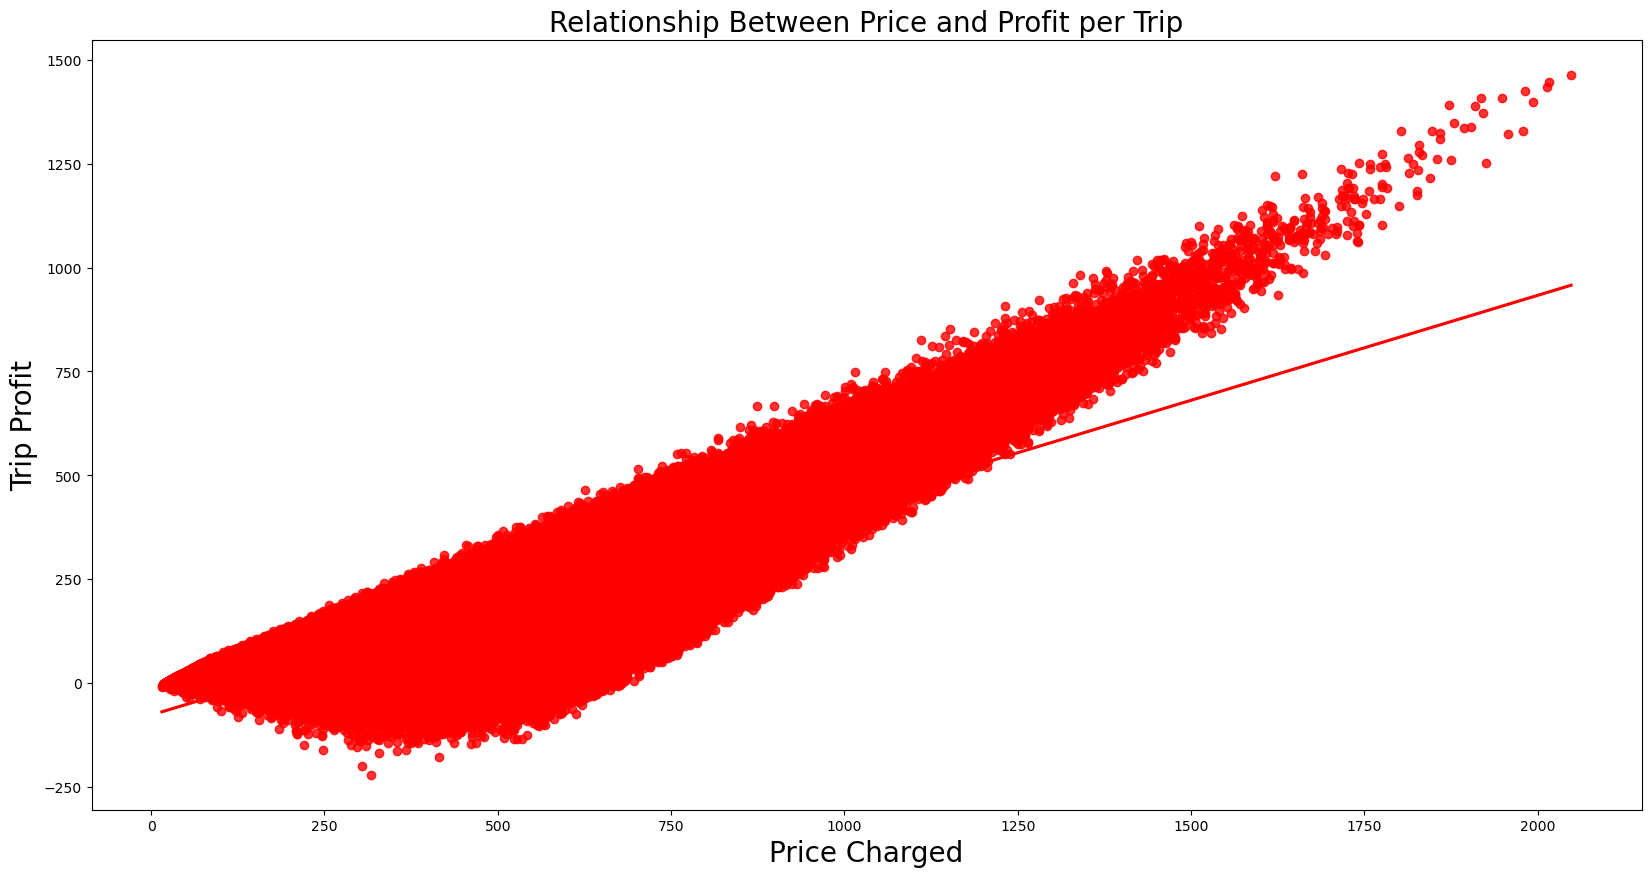

In [239]:
# Regression plot of Price Charged vs Trip Profit
plt.figure(figsize = (20,10))
sns.regplot(x = 'Price_Charged', y = 'Trip_Profit', data = df, color = 'red')
plt.xlabel('Price Charged', fontsize = 20)
plt.ylabel('Trip Profit', fontsize = 20)
plt.title('Relationship Between Price and Profit per Trip', fontsize = 20)
plt.show()

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64


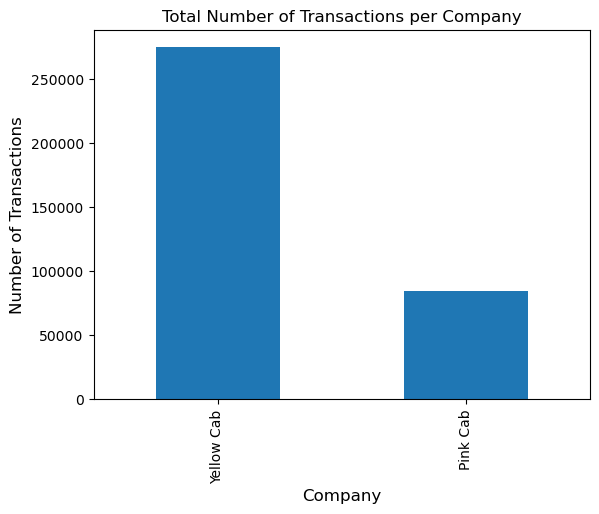

In [243]:
# Ascertain the number of transaction per company
transactions_per_company = df['Company'].value_counts()
print(transactions_per_company)

# Bar plot showing the number of transaction per company
transactions_per_company.plot(kind = 'bar')
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Number of Transactions', fontsize = 12)
plt.title('Total Number of Transactions per Company', fontsize = 12)
plt.show()

Gender
Male      205912
Female    153480
Name: count, dtype: int64


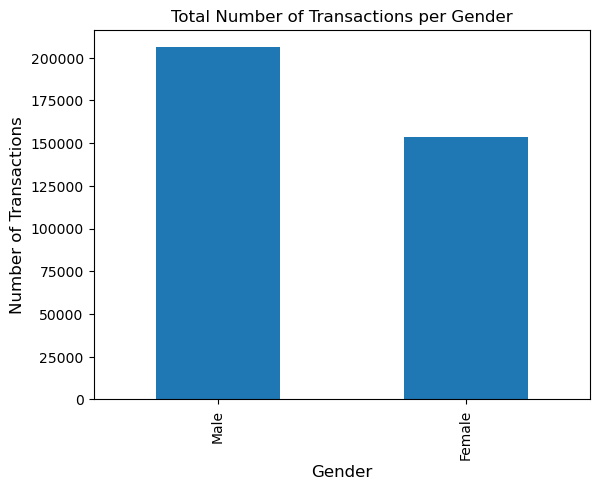

In [245]:
# Ascertain the number of transaction per gender
user_breakdown_gender = df['Gender'].value_counts()
print(user_breakdown_gender)

# Bar plot showing the number of transaction per gender
user_breakdown_gender.plot(kind = 'bar')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Number of Transactions', fontsize = 12)
plt.title('Total Number of Transactions per Gender', fontsize = 12)
plt.show()

Company
Pink Cab      26328251.33
Yellow Cab   125853887.19
Name: Price_Charged, dtype: float64


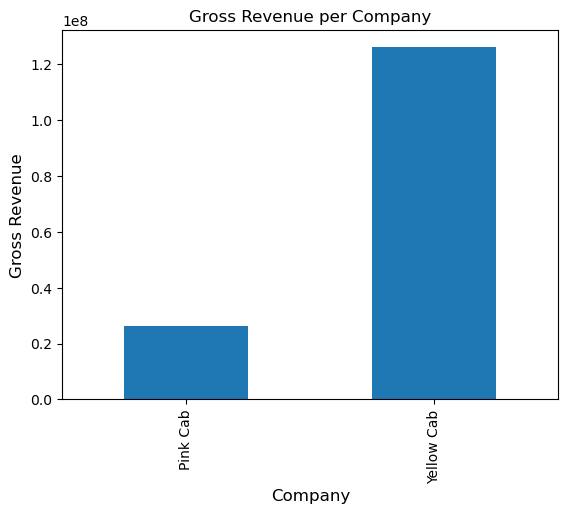

In [247]:
# Set number format to display as float instead of scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Calculate gross revenue per company
gross_revenue_per_company = df.groupby(['Company'])['Price_Charged'].sum()
print(gross_revenue_per_company)

# Bar plot showing gross revenue per company
gross_revenue_per_company.plot(kind = 'bar')
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Gross Revenue', fontsize = 12)
plt.title('Gross Revenue per Company', fontsize = 12)
plt.show()

Company
Pink Cab      5307328.32
Yellow Cab   44020373.17
Name: Trip_Profit, dtype: float64


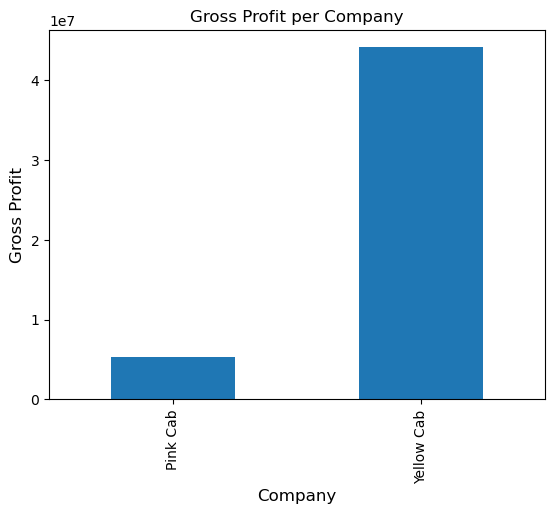

In [249]:
# Calculate gross profit per company
gross_profit_per_company = df.groupby(['Company'])['Trip_Profit'].sum()
print(gross_profit_per_company)

# Bar plot showing gross profit per company
gross_profit_per_company.plot(kind = 'bar')
plt.xlabel('Company', fontsize = 12)
plt.ylabel('Gross Profit', fontsize = 12)
plt.title('Gross Profit per Company', fontsize = 12)
plt.show()

In [165]:
# Convert date format to datetime
df['Date_of_Travel'] = pd.to_datetime(df['Date_of_Travel'], origin = '1899-12-30', unit = 'D')

In [167]:
# Set date to display as YY-MM-DD
df['Date_of_Travel'] = df['Date_of_Travel'].dt.strftime('%Y-%m-%d')

In [169]:
# Sorting by 'Date' column in ascending order and modifying the original DataFrame
df.sort_values(by='Date_of_Travel', inplace=True)

In [171]:
# Reset index of data frame
df.reset_index(drop = True, inplace = True)

# Display the first 5 rows
df.head()

,Date_of_Travel,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit,Payment_Mode,Customer_ID,Gender,Age,Income_(USD/Month)
0,2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.86,66.68,Card,52536,Male,24,10606
1,2016-01-02,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.66,165.00,Cash,4844,Male,32,5548
2,2016-01-02,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.08,195.75,Cash,5671,Male,24,7081
3,2016-01-02,10001001,Yellow Cab,NEW YORK NY,46.80,1391.91,595.30,796.61,Card,2761,Male,40,11462
4,2016-01-02,10000171,Pink Cab,SAN DIEGO CA,14.28,269.15,147.08,122.07,Cash,20687,Male,39,8926


In [173]:
# Convert date format to datetime
df['Date_of_Travel'] = pd.to_datetime(df['Date_of_Travel'])

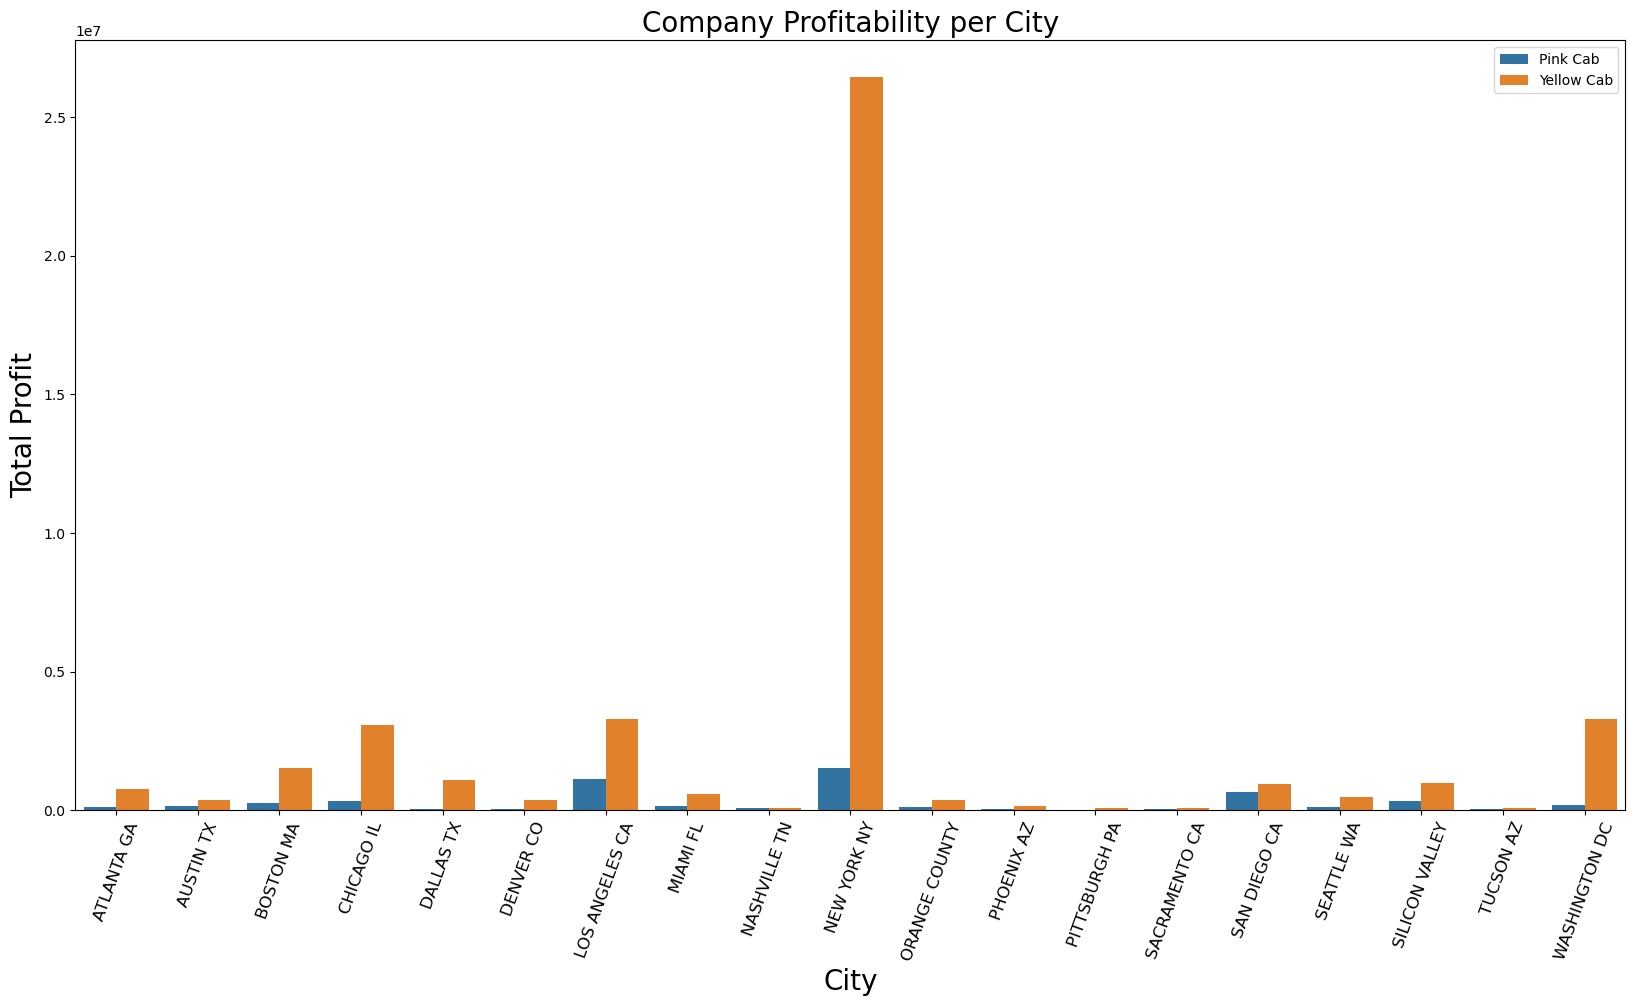

In [269]:
# Calculate the profit per city for each company
profit_city_company = df.groupby(['City', 'Company'])['Trip_Profit'].sum().reset_index()

# Bar plot showing the profit per city for each company
plt.figure(figsize = (20,10))
sns.barplot(data = profit_city_company, x = 'City', y = 'Trip_Profit', hue = 'Company')
plt.legend(loc='upper right')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('City', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Company Profitability per City', fontsize = 20)
plt.show()

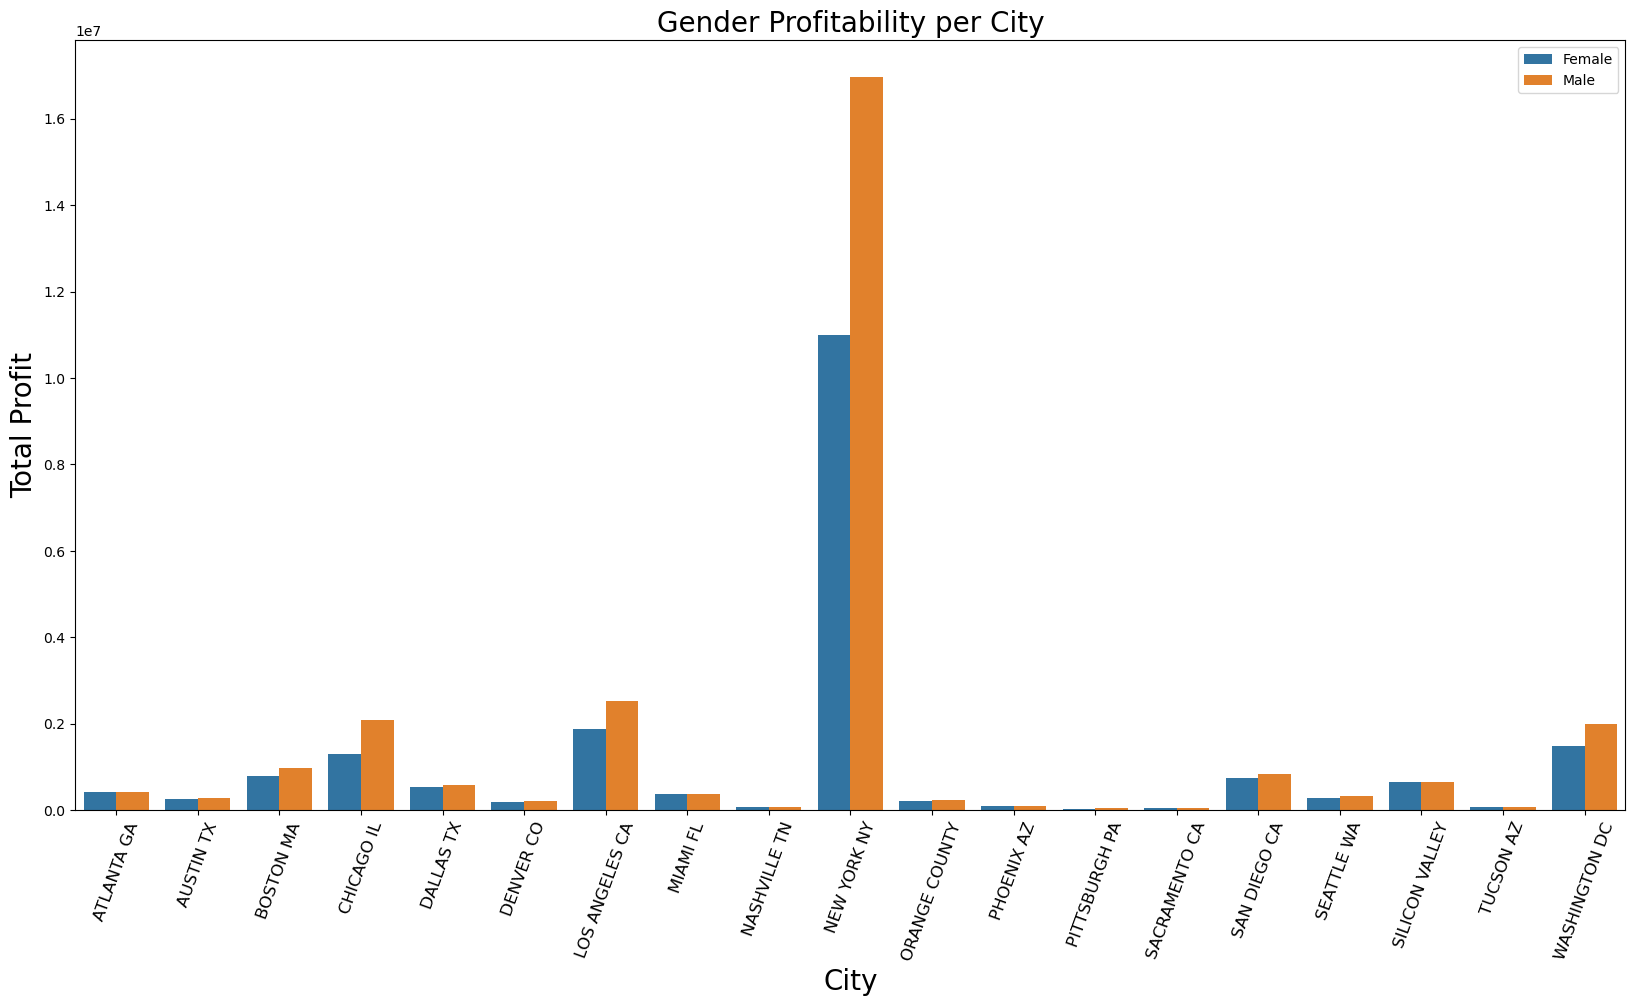

In [271]:
# Calculate the profit per city for each gender
profit_city_gender = df.groupby(['City', 'Gender'])['Trip_Profit'].sum().reset_index()

# Bar plot showing the profit per city for each gender
plt.figure(figsize = (20,10))
sns.barplot(data = profit_city_gender, x = 'City', y = 'Trip_Profit', hue = 'Gender')
plt.legend(loc='upper right')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('City', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Gender Profitability per City', fontsize = 20)
plt.show()

In [183]:
# Add a year column to data from
df['Year'] = df['Date_of_Travel'].dt.year

# Display the first 5 rows
df.head()

,Date_of_Travel,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit,Payment_Mode,Customer_ID,Gender,Age,Income_(USD/Month),Year
0,2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.86,66.68,Card,52536,Male,24,10606,2016
1,2016-01-02,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.66,165.00,Cash,4844,Male,32,5548,2016
2,2016-01-02,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.08,195.75,Cash,5671,Male,24,7081,2016
3,2016-01-02,10001001,Yellow Cab,NEW YORK NY,46.80,1391.91,595.30,796.61,Card,2761,Male,40,11462,2016
4,2016-01-02,10000171,Pink Cab,SAN DIEGO CA,14.28,269.15,147.08,122.07,Cash,20687,Male,39,8926,2016


   Year     Company  Trip_Profit
0  2016    Pink Cab   1713511.22
1  2016  Yellow Cab  13926995.43
2  2017    Pink Cab   2033654.91
3  2017  Yellow Cab  16575977.97
4  2018    Pink Cab   1560162.19
5  2018  Yellow Cab  13517399.77


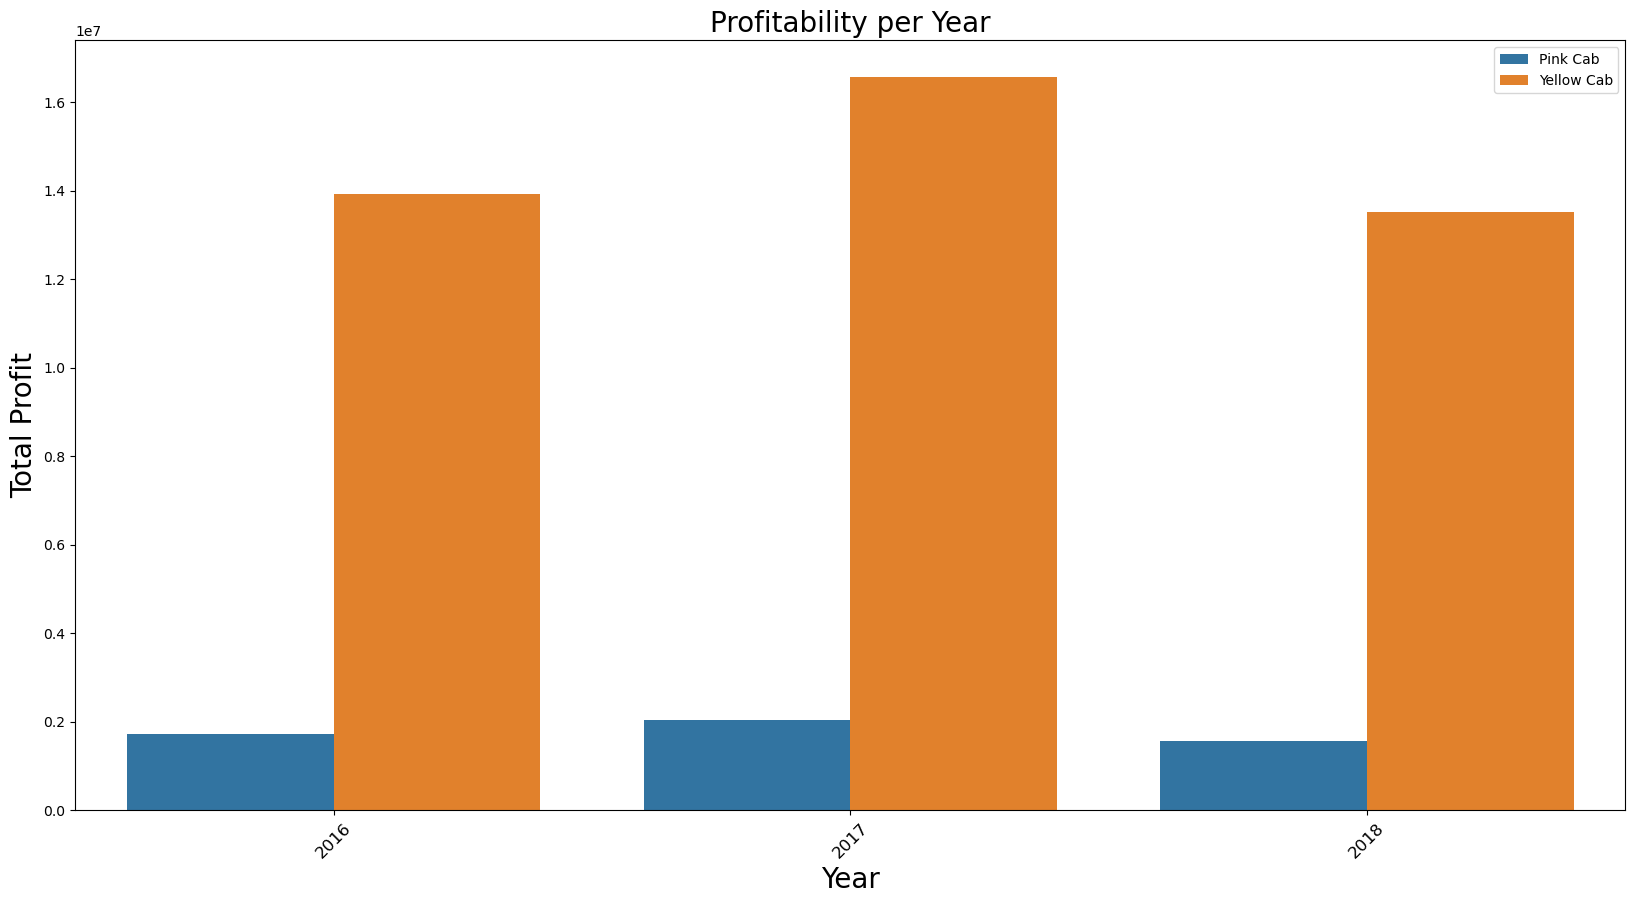

In [267]:
# Calculate the annual profit for each company
profit_per_year = df.groupby(['Year', 'Company'])['Trip_Profit'].sum().reset_index()
print(profit_per_year)

# Bar plot showing the annual profit per company
plt.figure(figsize = (20,10))
sns.barplot(data = profit_per_year, x = 'Year', y = 'Trip_Profit', hue = 'Company')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Profitability per Year', fontsize = 20)
plt.show()

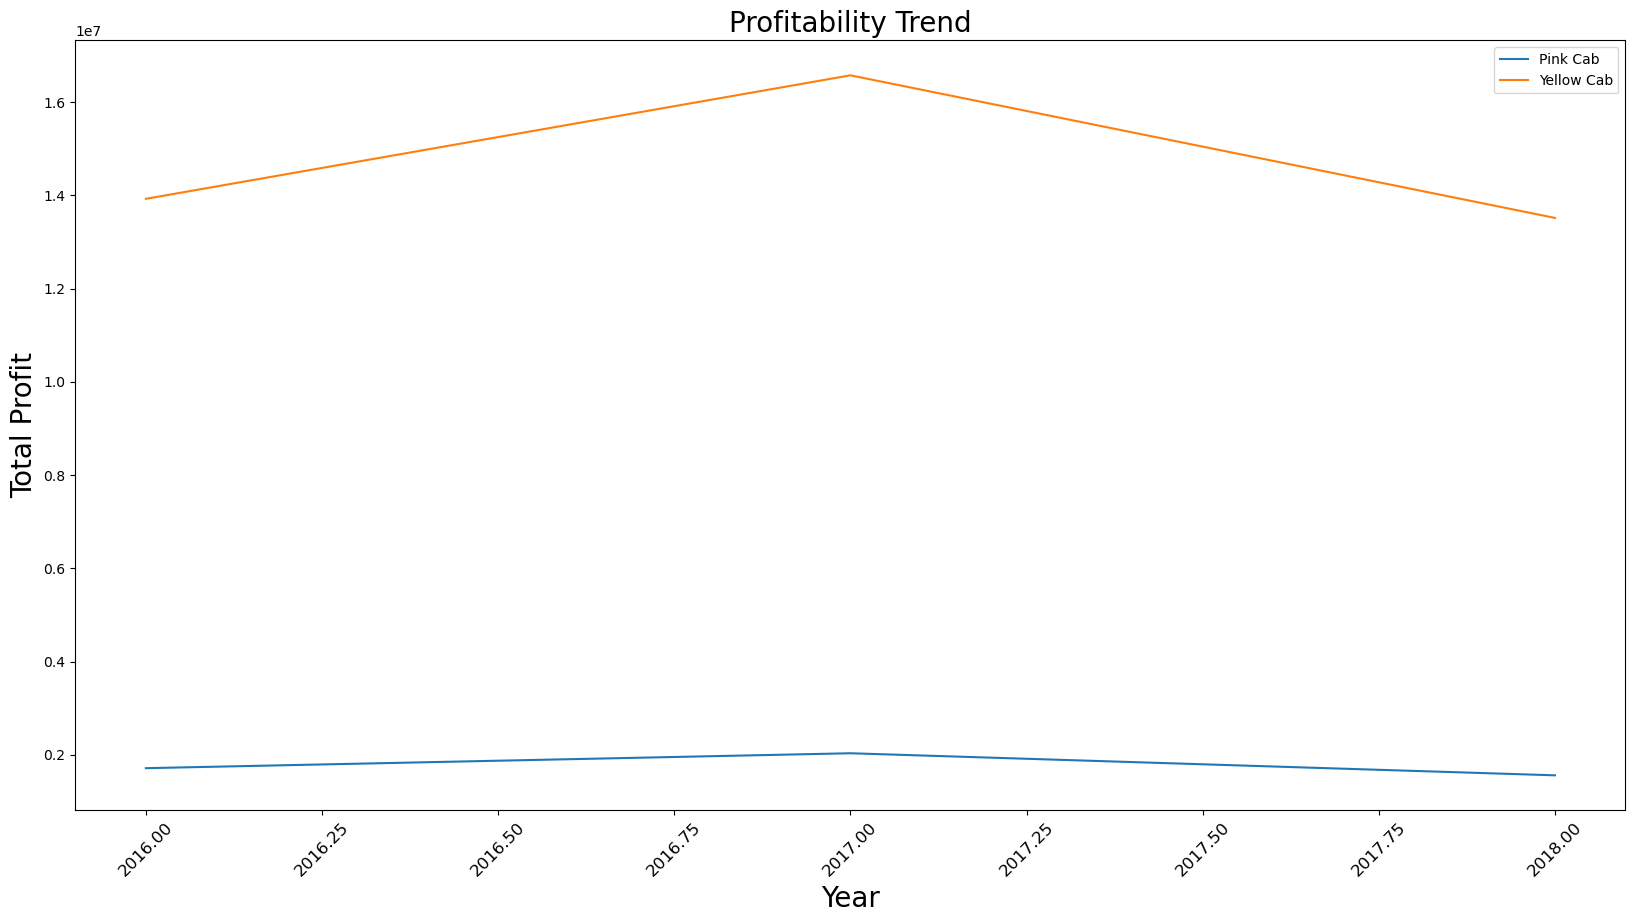

In [273]:
# Line graph showing profit trend per company
plt.figure(figsize = (20,10))
sns.lineplot(data = profit_per_year, x = 'Year', y = 'Trip_Profit', hue = 'Company')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Profitability Trend', fontsize = 20)
plt.show()

   Year     Company  Customer_ID
0  2016    Pink Cab        25080
1  2016  Yellow Cab        82239
2  2017    Pink Cab        30321
3  2017  Yellow Cab        98189
4  2018    Pink Cab        29310
5  2018  Yellow Cab        94253


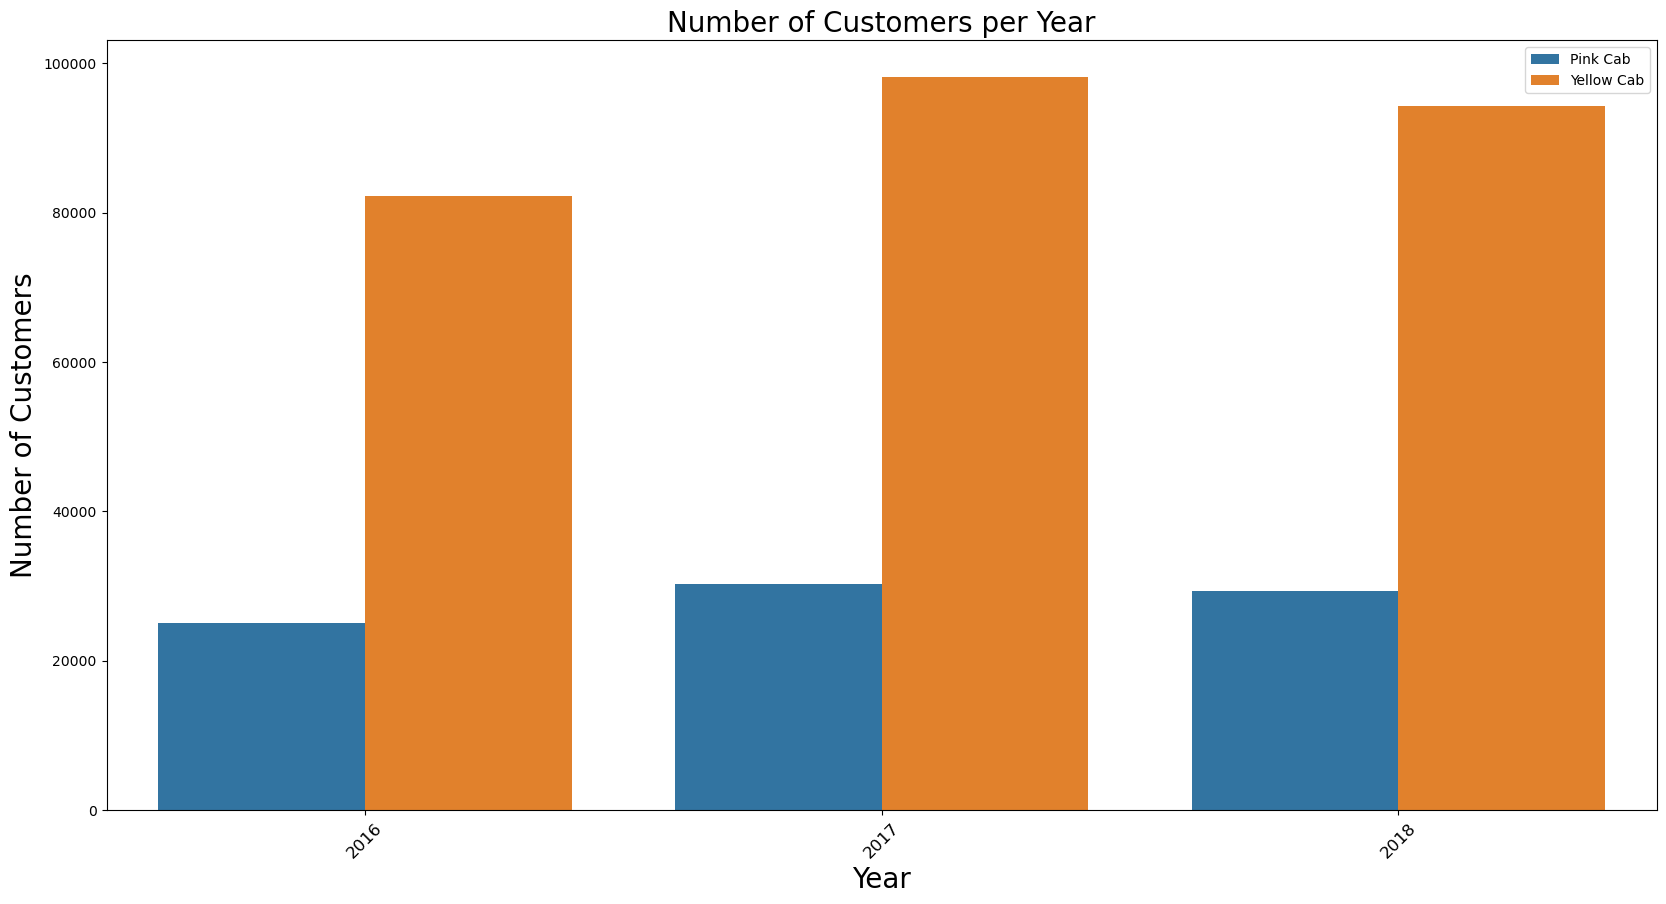

In [275]:
# Calculate the number of customers for each  company per year
customers_per_year = df.groupby(['Year', 'Company'])['Customer_ID'].count().reset_index()
print(customers_per_year)

# Bar plot showing the number of customers for each  company per year
plt.figure(figsize = (20,10))
sns.barplot(data = customers_per_year, x = 'Year', y = 'Customer_ID', hue = 'Company')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.title('Number of Customers per Year', fontsize = 20)
plt.show()

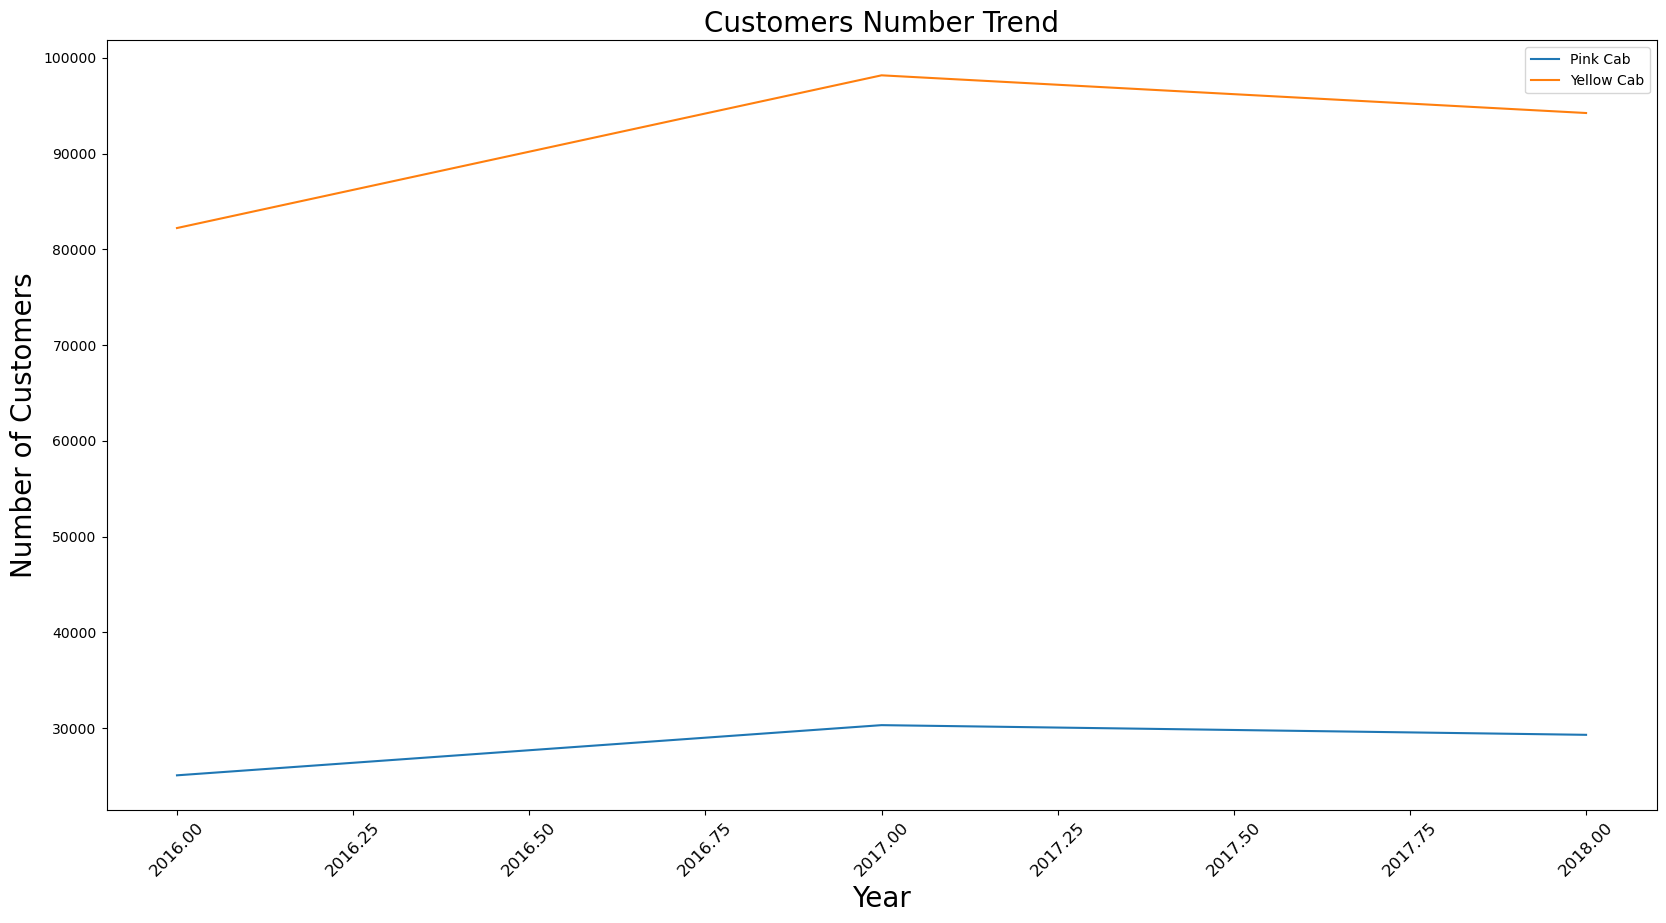

In [277]:
# Line graph showing customer number trend per company
plt.figure(figsize = (20,10))
sns.lineplot(data = customers_per_year, x = 'Year', y = 'Customer_ID', hue = 'Company')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.title('Customers Number Trend', fontsize = 20)
plt.show()

In [201]:
df.head()

,Date_of_Travel,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Trip_Profit,Payment_Mode,Customer_ID,Gender,Age,Income_(USD/Month),Year
0,2016-01-02,10001340,Yellow Cab,WASHINGTON DC,10.20,202.54,135.86,66.68,Card,52536,Male,24,10606,2016
1,2016-01-02,10000640,Yellow Cab,CHICAGO IL,15.60,374.66,209.66,165.00,Cash,4844,Male,32,5548,2016
2,2016-01-02,10000635,Yellow Cab,CHICAGO IL,25.08,532.83,337.08,195.75,Cash,5671,Male,24,7081,2016
3,2016-01-02,10001001,Yellow Cab,NEW YORK NY,46.80,1391.91,595.30,796.61,Card,2761,Male,40,11462,2016
4,2016-01-02,10000171,Pink Cab,SAN DIEGO CA,14.28,269.15,147.08,122.07,Cash,20687,Male,39,8926,2016


In [215]:
# Check for the age of the oldest customer
print(df['Age'].max())

65


In [207]:
# Create age segments or bins 
age_bins = [0, 18, 25, 35, 45, 55, 65]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65']

# Create a new column 'Age_Group' with binned data
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Count the number of customers in each age group
customers_demo = df.groupby(['Gender', 'Age_Group'])['Customer_ID'].count().reset_index()
print(customers_demo)

    Gender Age_Group  Customer_ID
0   Female      0-18         4703
1   Female     19-25        35357
2   Female     26-35        48603
3   Female     36-45        32020
4   Female     46-55        16572
5   Female     56-65        16225
6     Male      0-18         6143
7     Male     19-25        47141
8     Male     26-35        64811
9     Male     36-45        43978
10    Male     46-55        21988
11    Male     56-65        21851


/var/folders/yd/q8ddk1x1651865d_q9tcnklr0000gn/T/ipykernel_1226/1163992399.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers_demo = df.groupby(['Gender', 'Age_Group'])['Customer_ID'].count().reset_index()


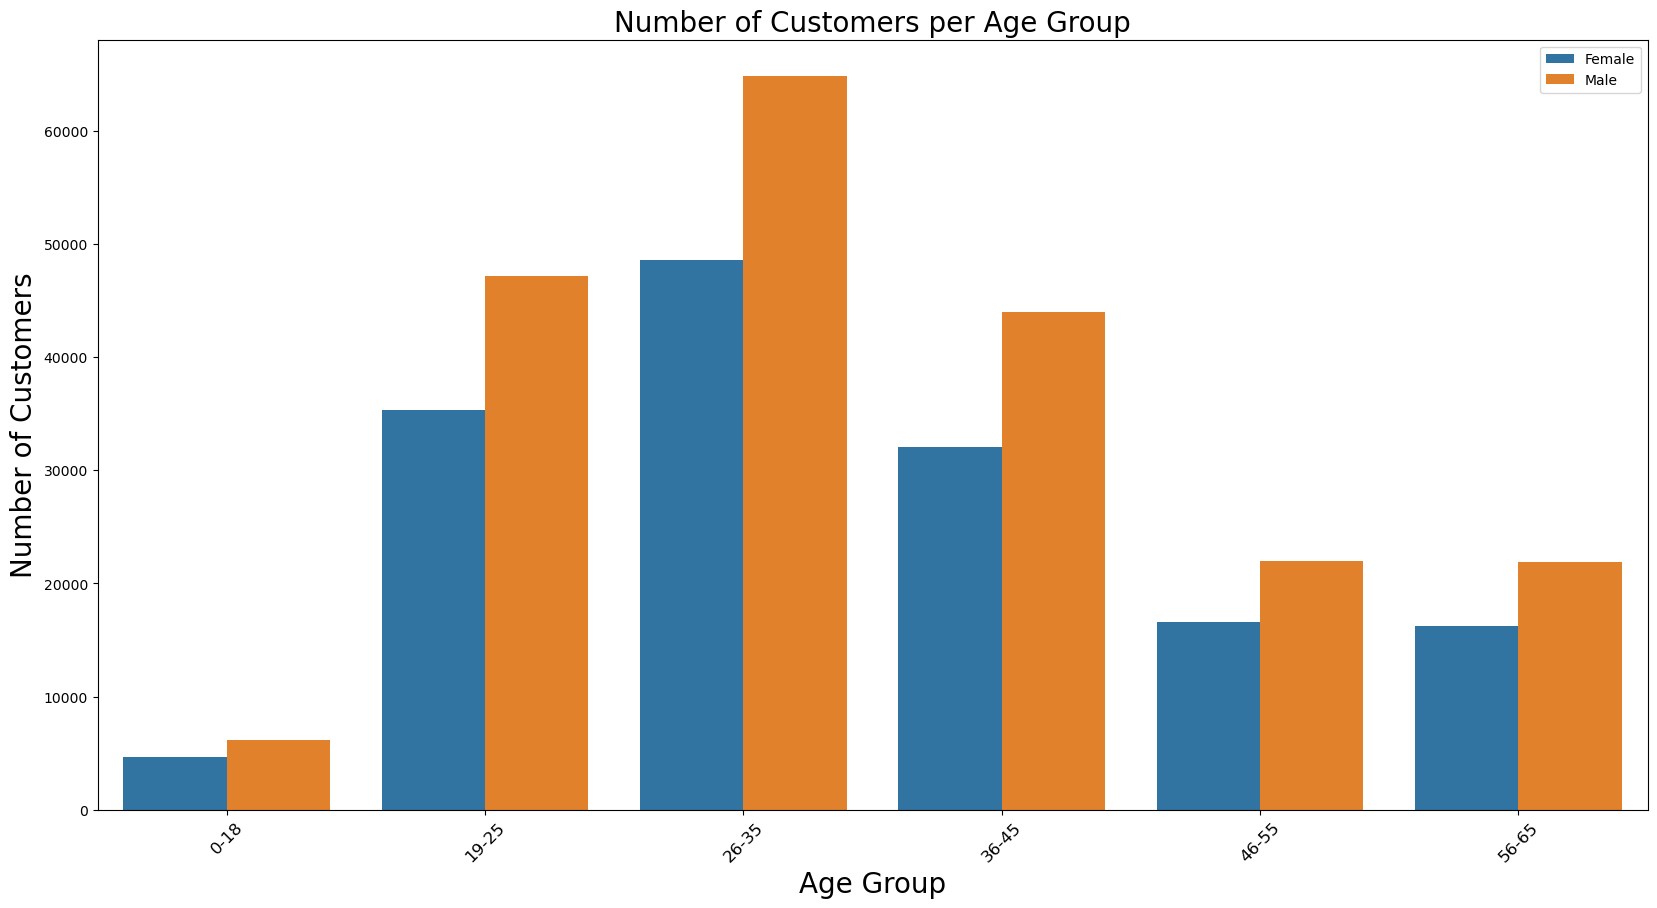

In [279]:
# Bar plot showing the number of customers in each age group
plt.figure(figsize = (20,10))
sns.barplot(data = customers_demo, x = 'Age_Group', y = 'Customer_ID', hue = 'Gender')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Age Group', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.title('Number of Customers per Age Group', fontsize = 20)
plt.show()

In [213]:
# Check for the highest monthly earning
print(df['Income_(USD/Month)'].max())

35000


In [219]:
# Create income segments or bins 
age_bins = [0, 2083, 4167, 8333, 16667, 41667]
age_labels = ['Low Income', 'Low-Middle Income', 'Middle Income', 'Upper-Middle Income', 'High Income']

# Create a new column 'Income_Level' with binned data
df['Income_Level'] = pd.cut(df['Income_(USD/Month)'], bins=age_bins, labels=age_labels)

# Count the number of customers in each income group
customers_income = df.groupby(['Gender', 'Income_Level'])['Customer_ID'].count().reset_index()
print(customers_income)


   Gender         Income_Level  Customer_ID
0  Female           Low Income          524
1  Female    Low-Middle Income        12995
2  Female        Middle Income        25166
3  Female  Upper-Middle Income        49397
4  Female          High Income        65398
5    Male           Low Income          832
6    Male    Low-Middle Income        16548
7    Male        Middle Income        32569
8    Male  Upper-Middle Income        69607
9    Male          High Income        86356


/var/folders/yd/q8ddk1x1651865d_q9tcnklr0000gn/T/ipykernel_1226/1129474534.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customers_income = df.groupby(['Gender', 'Income_Level'])['Customer_ID'].count().reset_index()


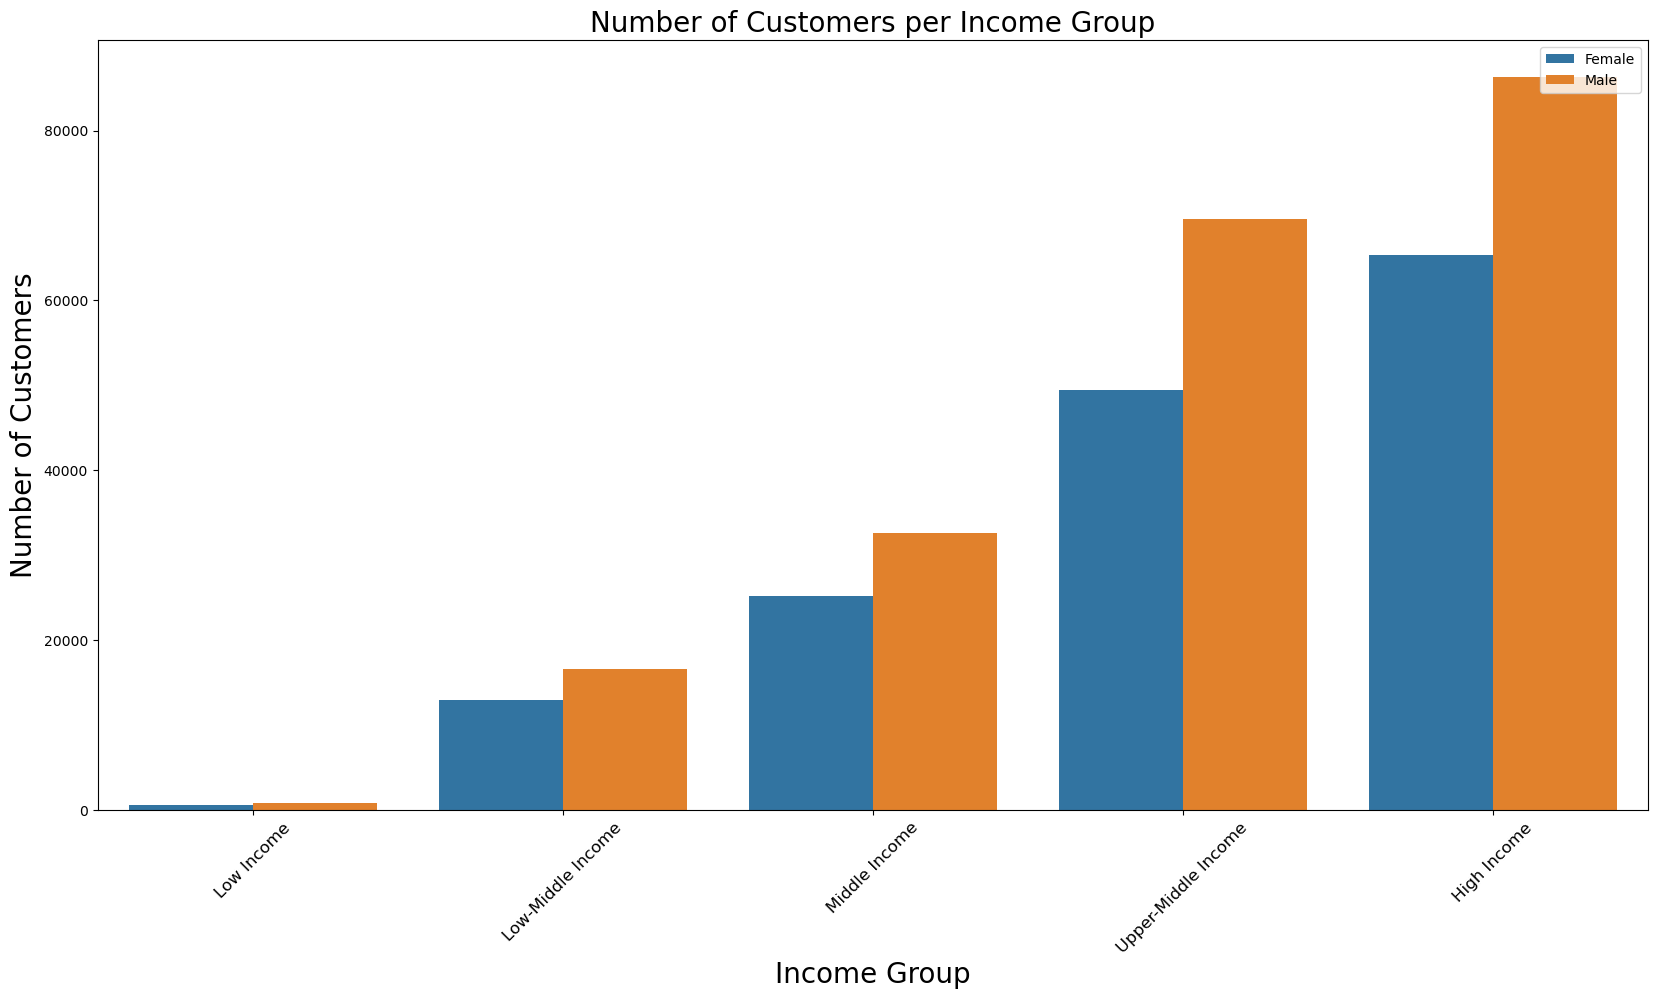

In [281]:
# Bar plot showing the number of customers in each income group
plt.figure(figsize = (20,10))
sns.barplot(data = customers_income, x = 'Income_Level', y = 'Customer_ID', hue = 'Gender')
plt.legend(loc='upper right')
plt.xticks(rotation=45, fontsize = 12)
plt.xlabel('Income Group', fontsize = 20)
plt.ylabel('Number of Customers', fontsize = 20)
plt.title('Number of Customers per Income Group', fontsize = 20)
plt.show()

/var/folders/yd/q8ddk1x1651865d_q9tcnklr0000gn/T/ipykernel_1226/3050024068.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_age_group = df.groupby(['Age_Group', 'Gender'])['Trip_Profit'].sum().reset_index()


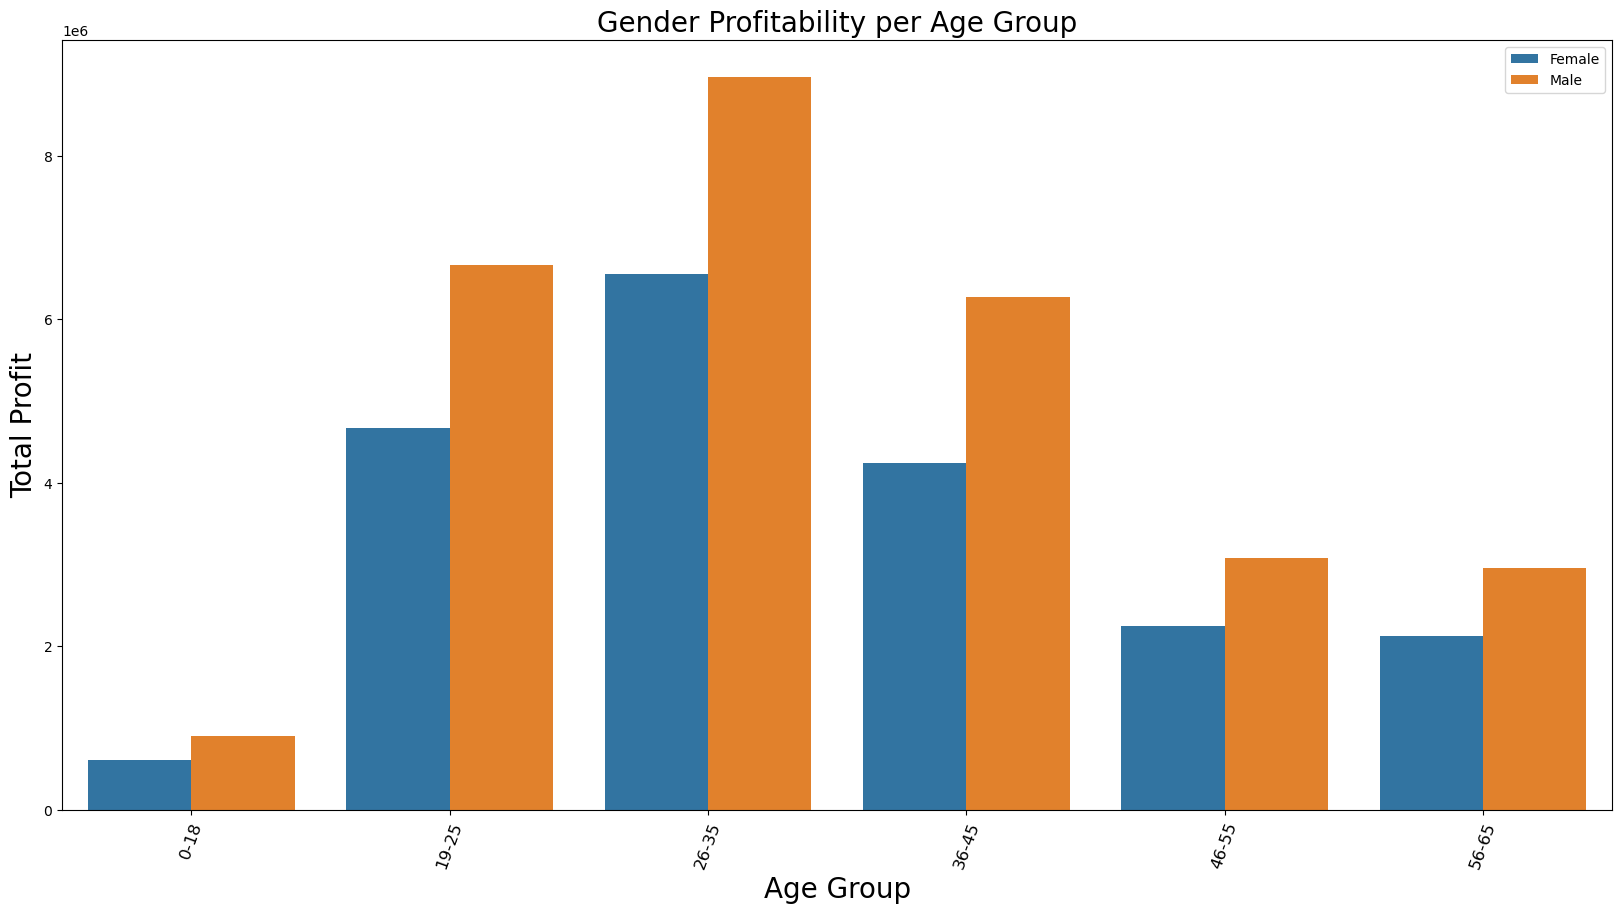

In [290]:
# Calculate the profit per age group for each gender
profit_age_group = df.groupby(['Age_Group', 'Gender'])['Trip_Profit'].sum().reset_index()

# Bar plot showing the profit per age group for each gender
plt.figure(figsize = (20,10))
sns.barplot(data = profit_age_group, x = 'Age_Group', y = 'Trip_Profit', hue = 'Gender')
plt.legend(loc='upper right')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Age Group', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Gender Profitability per Age Group', fontsize = 20)
plt.show()

/var/folders/yd/q8ddk1x1651865d_q9tcnklr0000gn/T/ipykernel_1226/4154392413.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_age_group = df.groupby(['Income_Level', 'Gender'])['Trip_Profit'].sum().reset_index()


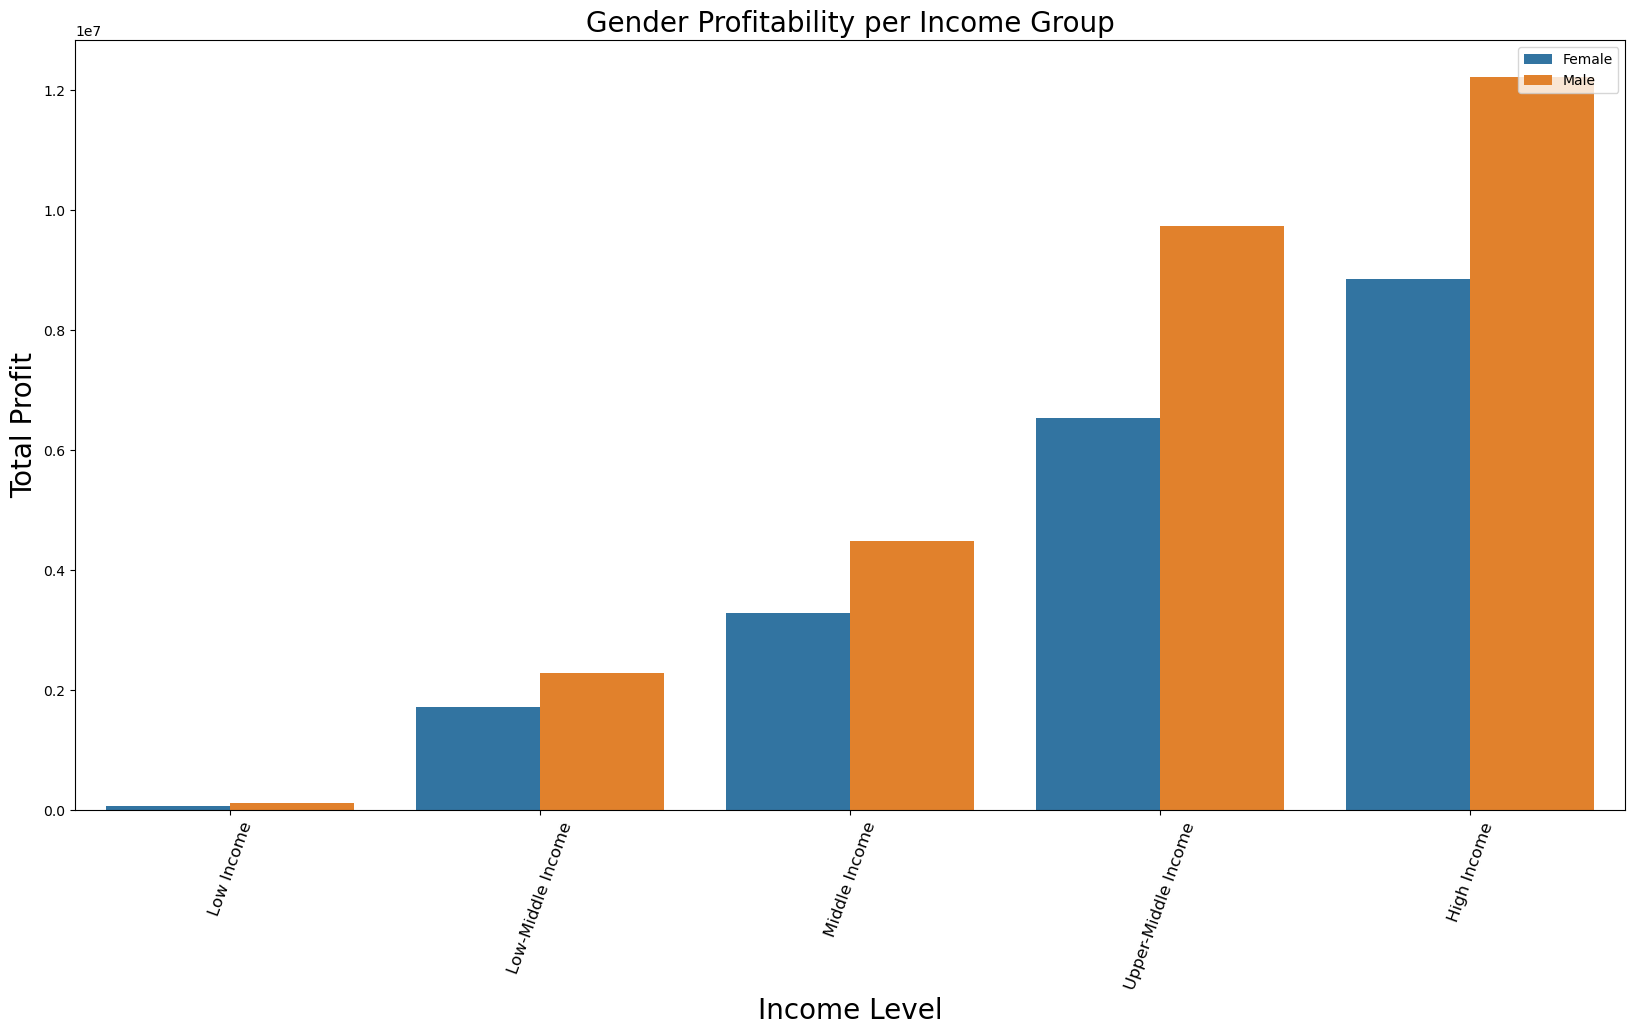

In [292]:
# Calculate the profit per income group for each gender
profit_age_group = df.groupby(['Income_Level', 'Gender'])['Trip_Profit'].sum().reset_index()

# Bar plot showing the profit per age group for each gender
plt.figure(figsize = (20,10))
sns.barplot(data = profit_age_group, x = 'Income_Level', y = 'Trip_Profit', hue = 'Gender')
plt.legend(loc='upper right')
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Income Level', fontsize = 20)
plt.ylabel('Total Profit', fontsize = 20)
plt.title('Gender Profitability per Income Group', fontsize = 20)
plt.show()

# Findings

### Based on the EDA:

* The Yellow Cab company does more transactions, is significantly more profitable as well as more stable than its competitor, the Pink Cab comapny.

* There is a high correlation bewteen trip charges and profit for each company, however, it is affected by what seems to be discounted prices from time to time. 

* The city of New York generates a large proprotion of the profits for the Yellow Cab company with Los Angeles, Washington and Chicgo also being noteworthy contributors.

* In all cities, males use the services more and hence are the greater contributor to company profits.

* The profitability of both companies is fairly stable, however, in 2017 the Yellow Cab company was more profitable as compared to 2016 and 2018.

* The trend in the number of customers follow a simliar pattern to that of the annual profitability for both companies.

* The 26 to 35 years old group is the highest user of the services for both males and females, followed by the 19 to 25 and the 36 to 45 age groups respectively.

* The high income group of customers is the most prominent group followed by upper-middle and middle class groups respectively. 